In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img =  cv2.imread('./Model/test_images/036_5e0af3bf.jpg')

img.shape

(474, 474, 3)

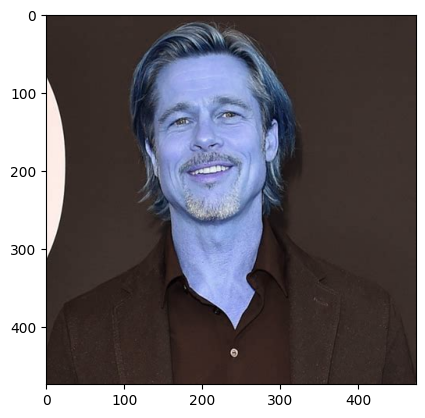

In [3]:
plt.imshow(img)

In [4]:
# making it a gray image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape 

(474, 474)

In [5]:
gray

array([[44, 44, 44, ..., 47, 47, 47],
       [43, 43, 43, ..., 47, 47, 47],
       [42, 42, 42, ..., 47, 47, 47],
       ...,
       [33, 34, 36, ..., 38, 37, 37],
       [70, 34, 38, ..., 40, 36, 71],
       [70, 34, 38, ..., 40, 36, 71]], dtype=uint8)

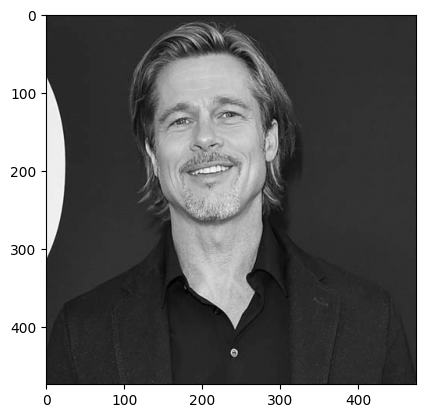

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./Model/Open_CV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./Model/Open_CV/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

faces


array([[108,  53, 199, 199]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(108, 53, 199, 199)

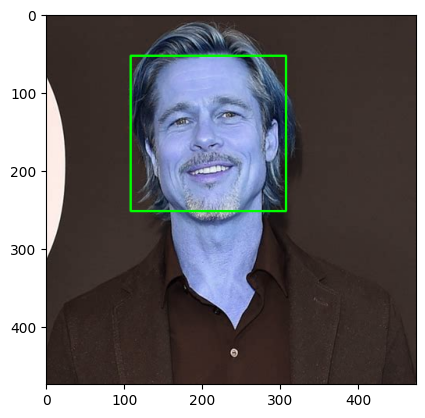

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)
plt.imshow(face_img)

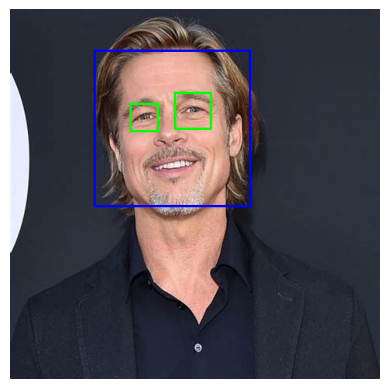

In [10]:

for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  

    # Extract the region of interest (ROI) for the face in grayscale and color
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        # Draw a rectangle around the eyes
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Display the result using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')  # Hide axis
plt.show()

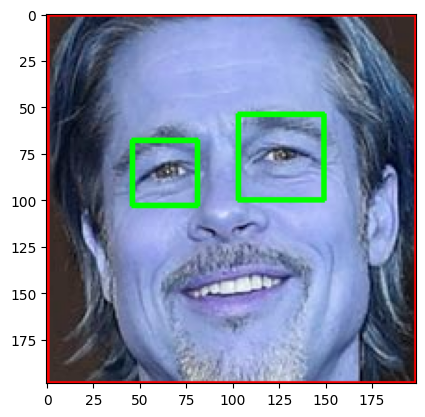

In [11]:
#cropping the image
%matplotlib inline  
plt.imshow(roi_color, cmap ='gray')

In [12]:
# Function

def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes)>2:
            return roi_color

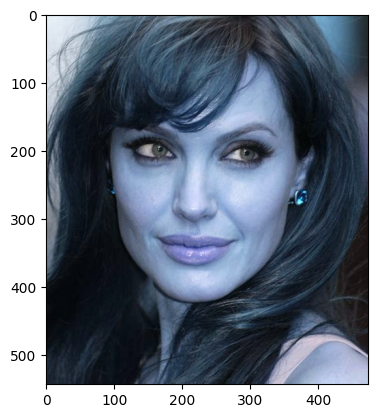

In [13]:
original_img = cv2.imread('./Model/test_images/051_268fdfd7.jpg')

plt.imshow(original_img)

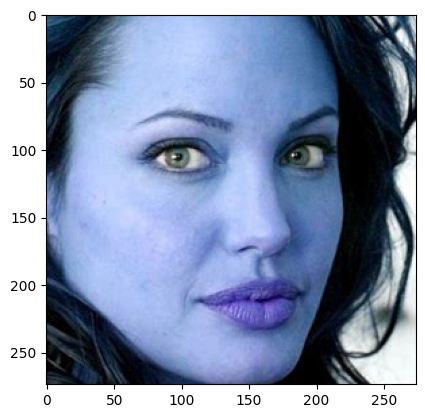

In [14]:
cropped_img = get_cropped_image('./Model/test_images/050_7c5b026c.jpg')

plt.imshow(cropped_img)

Creating Directory for Cleaned Images for Training Model

In [15]:
path_to_data = './Model/Dataset/'
path_to_cr_data ='./Model/cropped_images/'


In [16]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./Model/Dataset/Angelina_Jolie',
 './Model/Dataset/Brad_Pitt',
 './Model/Dataset/Denzel_Washington',
 './Model/Dataset/Hugh_Jackman',
 './Model/Dataset/Jennifer_Lawrence',
 './Model/Dataset/Johnny_Depp',
 './Model/Dataset/Kate_Winslet',
 './Model/Dataset/Leonardo_iCaprio',
 './Model/Dataset/Megan_Fox',
 './Model/Dataset/Natalie_Portman',
 './Model/Dataset/Nicole_Kidman',
 './Model/Dataset/Robert_Downey Jr',
 './Model/Dataset/Sandra_Bullock',
 './Model/Dataset/Scarlett_Johansson',
 './Model/Dataset/Tom_Cruise',
 './Model/Dataset/Tom_Hanks',
 './Model/Dataset/Will_Smith']

In [17]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.makedirs(path_to_cr_data)

In [18]:

# Making directories for each celebrities cropped images by their named folder

cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []


    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
         
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                
                print(cropped_folder)

            cropped_file_name = celebrity_name+str(count)+'.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)    

            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Angelina_Jolie
./Model/cropped_images/Angelina_Jolie
Brad_Pitt
./Model/cropped_images/Brad_Pitt
Denzel_Washington
./Model/cropped_images/Denzel_Washington
Hugh_Jackman
./Model/cropped_images/Hugh_Jackman
Jennifer_Lawrence
./Model/cropped_images/Jennifer_Lawrence
Johnny_Depp
./Model/cropped_images/Johnny_Depp
Kate_Winslet
./Model/cropped_images/Kate_Winslet
Leonardo_iCaprio
./Model/cropped_images/Leonardo_iCaprio
Megan_Fox
./Model/cropped_images/Megan_Fox
Natalie_Portman
./Model/cropped_images/Natalie_Portman
Nicole_Kidman
./Model/cropped_images/Nicole_Kidman
Robert_Downey Jr
./Model/cropped_images/Robert_Downey Jr
Sandra_Bullock
./Model/cropped_images/Sandra_Bullock
Scarlett_Johansson
./Model/cropped_images/Scarlett_Johansson
Tom_Cruise
./Model/cropped_images/Tom_Cruise
Tom_Hanks
./Model/cropped_images/Tom_Hanks
Will_Smith
./Model/cropped_images/Will_Smith


Augmentaion Process

In [20]:

import os
import random
import cv2
import numpy as np
import albumentations as A
import pywt
from skimage.feature import local_binary_pattern
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler



# Define augmentation pipeline
augmentations = A.Compose([
       A.HorizontalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomResizedCrop(height=32, width=32, scale=(0.75, 1.0), ratio=(0.9, 1.1), p=0.5),
    
    # Color/intensity adjustments (slightly stronger)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.3),
    
    # Noise and blur (more options with OneOf)
    A.OneOf([
        A.GaussianBlur(blur_limit=(3, 5), p=0.6),
        A.MotionBlur(blur_limit=(3, 5), p=0.6),
        A.MedianBlur(blur_limit=3, p=0.3),
    ], p=0.4),
    
    # Advanced techniques particularly useful for SVMs
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 30.0), p=0.5),
        A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=0.5),
        A.MultiplicativeNoise(multiplier=(0.95, 1.05), p=0.5)
    ], p=0.3),
    
    # Cutout/random erasing (helps with robustness)
    A.CoarseDropout(max_holes=3, max_height=4, max_width=4, min_holes=1, min_height=2, min_width=2, p=0.3),
    
    # Ensure final normalization for better SVM performance
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], p=1.0)
])

# Path to cropped dataset
path_to_cr_data = "./Model/cropped_images/"

# Step 1: Count images in each celebrity folder
celebrity_counts = {celeb: len(os.listdir(os.path.join(path_to_cr_data, celeb)))
                    for celeb in os.listdir(path_to_cr_data)
                    if os.path.isdir(os.path.join(path_to_cr_data, celeb))}

# Step 2: Find the maximum sample count
max_samples = max(celebrity_counts.values())

# Step 3: Augment images for underrepresented celebrities
for celeb, count in celebrity_counts.items():
    celeb_folder = os.path.join(path_to_cr_data, celeb)
    if count < max_samples:
        print(f"Augmenting images for {celeb}: {count} → {max_samples}")
        images_paths = [os.path.join(celeb_folder, img) for img in os.listdir(celeb_folder) if img.endswith(('.jpg', '.png'))]
        i = 0
        while count < max_samples:
            img_path = random.choice(images_paths)
            img = cv2.imread(img_path)
            if img is None:
                continue
            augmented = augmentations(image=img)['image']
            new_filename = f"aug_{i}_{random.randint(1000, 9999)}.png"
            cv2.imwrite(os.path.join(celeb_folder, new_filename), augmented)
            count += 1
            i += 1

print("Data augmentation completed!")


Data augmentation completed!


In [21]:
!pip install --upgrade pip
!pip install PyWavelets

In [22]:
def w2d(img, mode='haar', level=2):
    imArray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray) / 255.0
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0.5
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H = np.uint8(np.clip(imArray_H * 255, 0, 255))
    return imArray_H

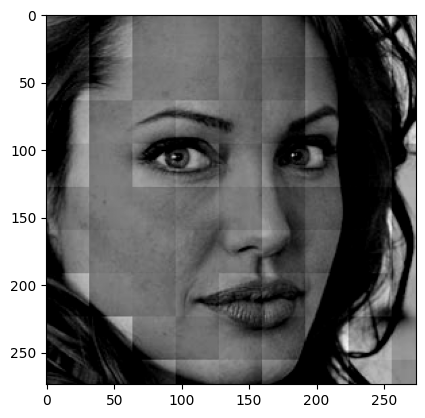

In [23]:
im_har = w2d(cropped_img,'db1' , 5)
plt.imshow(im_har, cmap = 'gray')

In [24]:
celebrity_file_names_dict

{'Angelina_Jolie': ['./Model/cropped_images/Angelina_Jolie/Angelina_Jolie1.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie2.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie3.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie4.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie5.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie6.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie7.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie8.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie9.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie10.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie11.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie12.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie13.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie14.png',
  './Model/cropped_images/Angelina_Jolie/Angelina_Jolie15.png',
  './Model/cropped_images/Angel

In [25]:
# The X and Y should bbe the number or, any kind of number of the celebrities of the images

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():

    class_dict[celebrity_name ] = count
    count += 1
class_dict    

{'Angelina_Jolie': 0,
 'Brad_Pitt': 1,
 'Denzel_Washington': 2,
 'Hugh_Jackman': 3,
 'Jennifer_Lawrence': 4,
 'Johnny_Depp': 5,
 'Kate_Winslet': 6,
 'Leonardo_iCaprio': 7,
 'Megan_Fox': 8,
 'Natalie_Portman': 9,
 'Nicole_Kidman': 10,
 'Robert_Downey Jr': 11,
 'Sandra_Bullock': 12,
 'Scarlett_Johansson': 13,
 'Tom_Cruise': 14,
 'Tom_Hanks': 15,
 'Will_Smith': 16}

In [363]:
# 32*32*3 + 32*32 (The raw image and the wavelet transformed images)

In [26]:
# Step 4: Load all augmented images and labels
X = []  # List to store image data
y = []  # List to store labels

for celeb in os.listdir(path_to_cr_data):
    celeb_folder = os.path.join(path_to_cr_data, celeb)
    if os.path.isdir(celeb_folder):
        for img_name in os.listdir(celeb_folder):
            if img_name.endswith(('.jpg', '.png')):
                img_path = os.path.join(celeb_folder, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (256, 256))  # Resize images to a consistent size (e.g., 32x32)
                    X.append(img)
                    y.append(celeb)  # Use folder name as label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

Model Training -

Training and Testing Split datasets

In [27]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 5: Flatten the images (if needed)
# If your model requires 2D input, flatten the last two dimensions
X = X.reshape(X.shape[0], -1)  # Shape will be (n_samples, n_features * n_channels)

# Step 6: Encode labels (convert string labels to integers)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to integers

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Step 8: Create and fit the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)

# Step 9: Evaluate the model
score = pipe.score(X_test, y_test)
print(f"Model accuracy: {score * 100}")


Model accuracy: 67.84452296819788


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        26
           1       0.37      0.58      0.45        12
           2       0.93      0.87      0.90        15
           3       0.68      0.71      0.70        21
           4       0.32      0.55      0.40        11
           5       0.64      0.50      0.56        18
           6       0.47      0.29      0.36        24
           7       0.50      0.80      0.62        10
           8       0.83      0.94      0.88        16
           9       0.61      0.73      0.67        15
          10       0.82      0.67      0.74        21
          11       0.78      0.67      0.72        21
          12       0.86      0.75      0.80        16
          13       0.92      0.80      0.86        15
          14       0.83      0.71      0.77        14
          15       0.71      0.94      0.81        16
          16       0.67      0.83      0.74        12

    accuracy              

GridSearch to try out different models with different parameters. To find out the best model with best fined tuned parameters.

In [517]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# # Define models and parameter grids
# models = {
#     "SVM": {
#         "model": SVC(),
#         "params": {
#             "C": [0.1, 1, 10],  # Regularization parameter
#             "kernel": ["linear", "rbf"],  # Kernel type
#             "gamma": ["scale", "auto"],  # Kernel coefficient
#         },
#     },
#     "Random Forest": {
#         "model": RandomForestClassifier(),
#         "params": {
#             "n_estimators": [50, 100, 200],  # Number of trees
#             "max_depth": [None, 10, 20],  # Maximum depth of trees
#             "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
#         },
#     },
#     "K-Nearest Neighbors": {
#         "model": KNeighborsClassifier(),
#         "params": {
#             "n_neighbors": [3, 5, 7],  # Number of neighbors
#             "weights": ["uniform", "distance"],  # Weighting strategy
#             "metric": ["euclidean", "manhattan"],  # Distance metric
#         },
#     },
# }

# # Perform Grid Search for each model
# best_models = {}
# for model_name, model_info in models.items():
#     print(f"Training {model_name}...")
#     grid_search = GridSearchCV(
#         estimator=model_info["model"],
#         param_grid=model_info["params"],
#         cv=5,  # 5-fold cross-validation
#         scoring="accuracy",  # Metric to optimize
#         n_jobs=-1,  # Use all available CPU cores
#     )
#     grid_search.fit(X_train, y_train)

#     # Store the best model and its parameters
#     best_models[model_name] = {
#         "model": grid_search.best_estimator_,
#         "params": grid_search.best_params_,
#         "score": grid_search.best_score_,
#     }

#     # Print results
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")
#     print("-" * 50)

# # Evaluate the best models on the test set
# for model_name, model_info in best_models.items():
#     model = model_info["model"]
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Test accuracy for {model_name}: {accuracy:.4f}")
#     print(classification_report(y_test, y_pred))
#     print("-" * 50)

# # Select the best model based on test accuracy
# best_model_name = max(best_models, key=lambda x: best_models[x]["score"])
# best_model = best_models[best_model_name]["model"]
# best_params = best_models[best_model_name]["params"]
# print(f"Best model: {best_model_name} with parameters {best_params}")

In [519]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df